In [5]:
import uproot
import matplotlib.pyplot as plt
import requests
import jsonlines

In [2]:
from collections import OrderedDict

In [4]:
dem = OrderedDict([("a", 1), ("b", 2), ("c", 3), ("d", 4)])

In [8]:
for key, value in dem.items():
    print(f"{key}:{value}")

a:1
b:2
c:3
d:4


In [2]:
out_file = uproot.open("../build/10GeV_100events_fastsim_onnx.root")

In [3]:
out_file.keys()

['events;1',
 'energyParticle;1',
 'energyDeposited;1',
 'energyRatio;1',
 'time;1',
 'longProfile;1',
 'transProfile;1',
 'longFirstMoment;1',
 'transFirstMoment;1',
 'longSecondMoment;1',
 'transSecondMoment;1',
 'hitType;1']

In [40]:
def recursiveTree(file, key=None):
    if isinstance(file, (uproot.dynamic.Model_TH1D_v1, uproot.dynamic.Model_TBranch_v8, uproot.dynamic.Model_TBranchElement_v1)):
        print(f"{key}: {type(file)}")
        return
    else:
        for key in file.keys():
            recursiveTree(file[key], key)

In [41]:
recursiveTree(out_file)

EnergyMC: <class 'uproot.dynamic.Model_TBranch_v8'>
EnergyCell: <class 'uproot.dynamic.Model_TBranchElement_v1'>
rhoCell: <class 'uproot.dynamic.Model_TBranchElement_v1'>
phiCell: <class 'uproot.dynamic.Model_TBranchElement_v1'>
zCell: <class 'uproot.dynamic.Model_TBranchElement_v1'>
SimTime: <class 'uproot.dynamic.Model_TBranch_v8'>
CPUResMem: <class 'uproot.dynamic.Model_TBranch_v8'>
CPUVirMem: <class 'uproot.dynamic.Model_TBranch_v8'>
GPUMem: <class 'uproot.dynamic.Model_TBranch_v8'>
energyParticle;1: <class 'uproot.dynamic.Model_TH1D_v1'>
energyDeposited;1: <class 'uproot.dynamic.Model_TH1D_v1'>
energyRatio;1: <class 'uproot.dynamic.Model_TH1D_v1'>
time;1: <class 'uproot.dynamic.Model_TH1D_v1'>
longProfile;1: <class 'uproot.dynamic.Model_TH1D_v1'>
transProfile;1: <class 'uproot.dynamic.Model_TH1D_v1'>
longFirstMoment;1: <class 'uproot.dynamic.Model_TH1D_v1'>
transFirstMoment;1: <class 'uproot.dynamic.Model_TH1D_v1'>
longSecondMoment;1: <class 'uproot.dynamic.Model_TH1D_v1'>
transSe

In [39]:
type(out_file["events;1"]['rhoCell'])

uproot.dynamic.Model_TBranchElement_v1

In [27]:
isinstance(out_file["events;1"], uproot.Model_TH1D_v1)

AttributeError: module 'uproot' has no attribute 'Model_TH1D_v1'

In [9]:
out_file['events;1'].keys()

['EnergyMC',
 'EnergyCell',
 'rhoCell',
 'phiCell',
 'zCell',
 'SimTime',
 'CPUResMem',
 'CPUVirMem',
 'GPUMem']

In [12]:
plt.plot(out_file['events;1']['CPUResMem'].array())

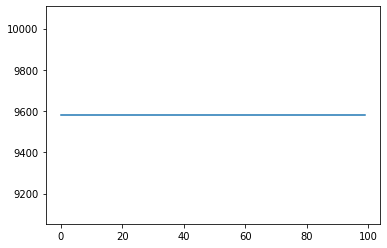

In [13]:
plt.plot(out_file['events;1']['CPUVirMem'].array())

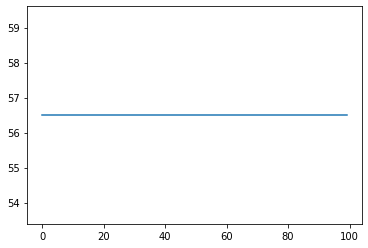

In [14]:
plt.plot(out_file['events;1']['GPUMem'].array())